# Word Cloud

## Important Steps

- Prepare word frequency data
    - `List`: Word list
    - `dictionary`: Word frequency dictionary

- Determine filtering criteria
    - remove stopwords?
    - remove low-frequency words?

- Chinese font issues
    - Check system-supported Chinese fonts
    
    ```
    !fc-list :lang=zh  
    ```
    
    - Specify the font_path when initialize the `WordCloud`
    

- `WordCloud` Parameters (selective)

```
wc = WordCloud(
    font_path=..., # chinese font path
    width=...,
    height=...,
    margin=...,
    mask=...,
    max_words=...,
    min_font_size=4,
    max_font_size=None,
    stopwords=None, # a set with stopwords
    random_state=None,
    min_word_length=0
```
- Creating the word cloud from data
    - `WordCloud.generate()` expects a text (non-word-segmented long string of texts)
    - `WordCloud.generate_from_frequencies()` expects a dictionary of {word:freq}

- Increase Wordcloud resolution:
    - When intializing the WordCloud, specify the `width` and `heigth`
    - When plotting, specify the figure size of plt:
    ```
    plt.figure(figsize=(20,10), facecolor='k')
    ```
- Create a image-masked word cloud
    - Prepare a jpg of the mask (the white background will mask the words)

```
import imageio
from wordcloud import WordCloud, ImageColorGenerator

back_color = imageio.imread(IMAGE_PATH)

wordcloud = WordCloud(mask=back_color)

plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

wordcloud.to_file(PATH)


# Use image color for words
image_colors = ImageColorGenerator(back_color)
plt.imshow(wordcloud.recolor(color_func=image_colors))
```

## Demonstration

- Extract the first article from Google News
- Tokenize the news
- Create the word cloud

In [6]:
## Prepare Text Data

import requests 
from bs4 import BeautifulSoup
import pandas as pd
 
 
url = 'https://news.google.com/topics/CAAqJQgKIh9DQkFTRVFvSUwyMHZNRFptTXpJU0JYcG9MVlJYS0FBUAE?hl=zh-TW&gl=TW&ceid=TW%3Azh-Hant'
r = requests.get(url)
web_content = r.text
soup = BeautifulSoup(web_content,'html.parser')
title = soup.find_all('a', class_='DY5T1d')
first_art_link = title[0]['href'].replace('.','https://news.google.com',1)

#print(first_art_link)
art_request = requests.get(first_art_link)
art_request.encoding='utf8'
soup_art = BeautifulSoup(art_request.text,'html.parser')

art_content = soup_art.find_all('p')
art_texts = [p.text for p in art_content]
print(art_texts)
## Create Word Cloud

['政府開放進口萊克多巴胺美豬，有十一縣市擬訂定自治條例要求萊劑零檢出，本報昨天報導地方政府近日收到行政院和衛福部函文，行政院僅諮詢地方意見，衛福部卻要求地方檢討修正。衛福部次長薛瑞元昨天在立法院原本態度強硬，指地方未檢討自治條例，明年將牴觸母法直接失效，但隨後態度轉彎，說會重新發函，請地方先提意見說明。', '\n', '\n重新發函 請地方先提意見說明', '\n衛福部日前發文至各縣市，強調地方自治條例因牴觸母法，地方政府萊克多巴胺零檢出政策將不具效力，衛福部次長薛瑞元昨一早態度強硬，但稍晚態度轉彎。記者潘俊宏／攝影', '\r\n衛福部長陳時中昨天也說，最後要看立法院審查結果，才知是否與地方自治條例有所牴觸，態度轉趨保守。衛福部已火速於昨晚重新發函。', '\n', '\r\n根據衛福部資料，宜蘭縣、台東縣全面禁止含有萊克多巴胺的「所有肉品」，台北市、桃園市、台南市、台中市、嘉義市、基隆市、彰化縣、雲林縣、新竹縣等九縣市要求「豬肉」萊克多巴胺須零檢出。', '\n', '\r\n立法院昨審查農委會開放萊豬進口相關行政命令，但立委質疑，若地方堅持不調整，中央是否主動出手撤銷自治條例？薛瑞元答詢說，不會用撤銷手段，萊劑殘留容許量明年元旦才生效，目前地方訂定零檢出仍有效，但應開始檢討，否則明年牴觸母法將被公告無效。', '\n', '\n立委質疑 衛福部與政院不同調', '\n', '\r\n隨後立委林奕華質詢，指行政院發函給台中市等直轄市政府的函文僅提醒回覆意見，衛福部發給非直轄市政府的函文卻直接要求「修正」，中央步調明顯不同。薛瑞元改口表示，會重新發文給七個非直轄市政府，文字調整成與行政院一致。', '\n', '\r\n根據衛福部九月卅日發的函，指動物用藥殘留標準已經中央發布，「自治法規如有與該標準牴觸情形，應配合修正」。但行政院十月廿六日發的函，僅表示地方零檢出自治條例有抵制中央法規疑慮，應於一個月內提出意見說明。', '\n', '\r\n行政院昨重申，進口含萊克多巴胺豬肉的行政命令尚未生效，現在仍是詢問意見與溝通期，將持續溝通。', '\n', '\r\n但行政院也強調，發函未與衛福部不同調。政院人士表示，兩個函文意義皆相同，都是提醒地方政府自治條例有與中央牴觸的疑慮，都有建議其修正，只是一個放主旨，一個放函文後的相關建議。', '\n', '\n藍營痛

In [9]:
import jieba

jieba.set_dictionary('../../../../_MySyncDrive/RepositoryData/data/jiaba/dict.txt.big.txt')

art_words = [w for w in jieba.cut(' '.join(art_texts))]
## Fine-tune Word Cloud

Building prefix dict from /Users/alvinchen/GoogleDrive/_MySyncDrive/RepositoryData/data/jiaba/dict.txt.big.txt ...
Loading model from cache /var/folders/0v/47nxlfjn26536t51wxj9j6q40000gn/T/jieba.u60c9a419281c3dbb1eab685659d52c83.cache
Loading model cost 0.965 seconds.
Prefix dict has been built successfully.


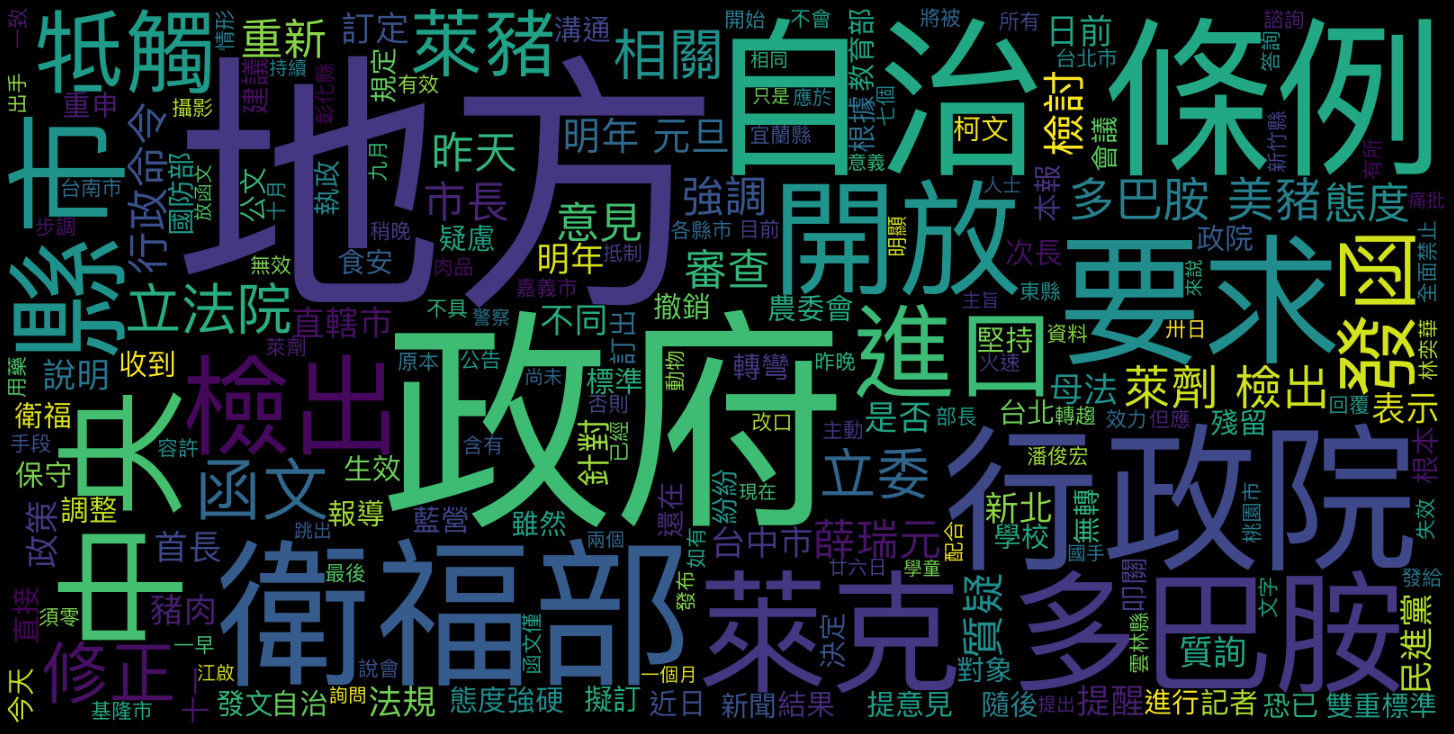

In [11]:
from collections import Counter
import imageio
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from matplotlib import pyplot as plt


## Check font paths
## !fc-list :lang=zh


## Load stopwords
with open('../../../../_MySyncDrive/RepositoryData/data/stopwords/tomlinNTUB-chinese-stopwords.txt') as f:
    stopwords = [w.strip() for w in f.readlines()]
    
# Create stopwords ad hoc
stopwords = set(['一個'])
wordcloud = WordCloud(font_path="/System/Library/Fonts/PingFang.ttc",
                      background_color='black',
                      #stopwords=stopwords,
                      width=1600, height=800 
                     )  ##add  system chinese font path
wordcloud.generate(' '.join([w for w in art_words if w not in stopwords]))
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
#plt.savefig('../data/twp-wordcloud2.png', facecolor='k', bbox_inches='tight')



## References

- [筆記 for Python (Jieba + Wordcloud)](https://medium.com/@fsflyingsoar/%E7%AD%86%E8%A8%98-for-python-jieba-wordcloud-b814f5e04e01)

- [以 jieba 與 gensim 探索文本主題：五月天人生無限公司歌詞分析 ( I )](https://medium.com/pyladies-taiwan/%E4%BB%A5-jieba-%E8%88%87-gensim-%E6%8E%A2%E7%B4%A2%E6%96%87%E6%9C%AC%E4%B8%BB%E9%A1%8C-%E4%BA%94%E6%9C%88%E5%A4%A9%E4%BA%BA%E7%94%9F%E7%84%A1%E9%99%90%E5%85%AC%E5%8F%B8%E6%AD%8C%E8%A9%9E%E5%88%86%E6%9E%90-i-cd2147b89083)